In [8]:
%matplotlib inline
from sklearn.datasets import make_circles, make_moons, make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)

# of cluster: 2
DBSCAN Y-hat: [0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0
 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0]


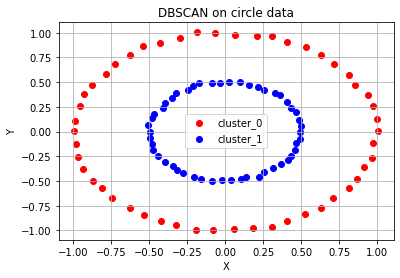

In [13]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

# 원형 분포 데이터 plot
epsilon, minPts = 0.2, 3 # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts) # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
circle_dbscan.fit(circle_points) # 3) ~ 5) 과정을 반복
n_cluster = max(circle_dbscan.labels_)+1 # 3) ~5) 과정의 반복으로 클러스터의 수 도출

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1]


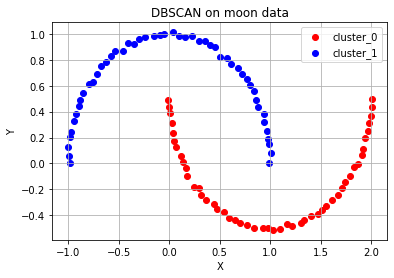

In [9]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

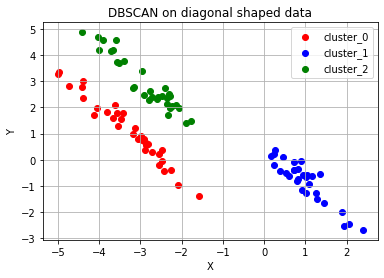

In [17]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()